# Minimal Example

This shows a very simple desease spread simulation


In [1]:
import random

import seaborn as sns

import popy

# for reproducibilty
random.seed(1337)

Let's set up two kinds of agents. They are very similar - except one is healthy and the other one is infected.


In [2]:
class InfectionAgent(popy.Agent):
    def setup(self):
        self.is_infected = False

    def infect(self):
        if not self.is_infected:
            return
        for contact in self.contacts():
            # if person is infected:
            # every contact in in every
            # shared location is infected with .1 propability
            p_infect = random.random()
            if p_infect < 0.1:
                contact.is_infected = True

We can now create our Population and assign agents to some locations. Agents can **only** interact if they share at least one location.


In [3]:
class Population:
    def __init__(self, model) -> None:
        self.model = model

        # create 5 agents - none of them are infected right now
        self.agents = popy.AgentList(model, 6, InfectionAgent)

        # set one random agent to be infected
        self.agents.random().is_infected = 1

        # create 3 different locations
        self.locations = popy.LocationList(model, 3, popy.Location)

        # home 1
        self.agents[0].add_location(self.locations[0])
        self.agents[1].add_location(self.locations[0])
        self.agents[2].add_location(self.locations[0])

        # school
        self.agents[2].add_location(self.locations[1])
        self.agents[3].add_location(self.locations[1])

        # home 2
        self.agents[3].add_location(self.locations[2])
        self.agents[4].add_location(self.locations[2])
        self.agents[5].add_location(self.locations[2])

        self.agents.shuffle()

    def update(self) -> None:
        self.agents.visit_locations(self.model)

Finally, we can specify our model like we do in agentpy.


In [4]:
class MyModel(popy.Model):
    def setup(self):
        self.population = Population(self)

    def step(self):
        self.population.agents.infect()

    def update(self):
        self.population.agents.record("is_infected")

    def end(self):
        pass

Let's now row run our model:


In [5]:
model = MyModel(parameters={"steps": 30})
results = model.run()

Completed: 30 steps
Run time: 0:00:00.022031
Simulation finished


And plot the amount of infected agents at each timestep:


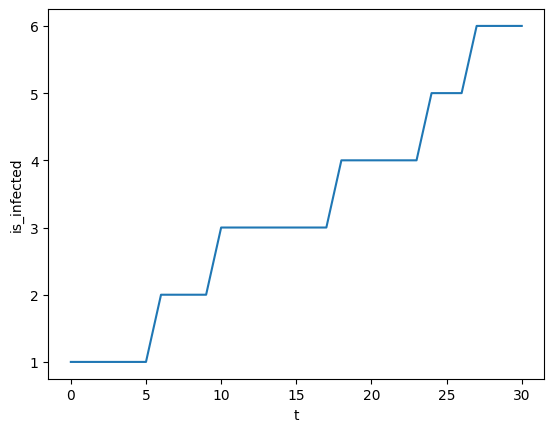

In [6]:
df = results.arrange_variables()

data = df.groupby("t").is_infected.sum().reset_index()

_ = sns.lineplot(data, x="t", y="is_infected")